#这是我人工智能原理的作业一，也是我第一次尝试编写稍微大一点的Python程序。
#首先我们进行数据集和包的导入，这个操作我直接cv过好多次但是真正自己写还是第一次

In [84]:

import matplotlib.pyplot as plt
import numpy as np 
import load_data
from linearpredict import linear_predictor
Train_dir="train.txt"#相对路径
Test_dir="test.txt"
try:
    del X_train
    del Y_train
    
    print("数据已经加载过")
except:
    pass

X_train,Y_train=load_data.load_dataset_train(Train_dir)
X_test=load_data.load_dataset_test(Test_dir)

数据已经加载过


现在我们导入了数据集，
并且把X,Y分别储存在了X_train，Y_train中，以numpy数组的形式储存，至于为什么不用普通数组而要用numpy，原因是numpy可以直接对整个数组进行处理，比笨办法快不止一倍
接下来我们试着可视化一下这个散点图
这么简单的数据不需要预处理，所以就跳过

[]

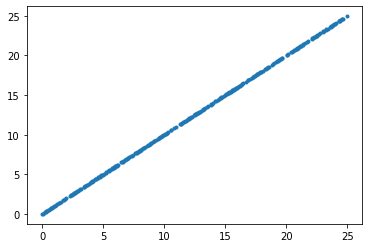

In [85]:
plt.scatter(X_train,Y_train,marker=".")
plt.plot()


接下来我们开始写这个作业的核心部分：线性拟合器，linearpredict.py：
我们定义一个拟合器类，然后把W作为它的成员变量,还有train，predict，loss作为他的成员方法。
然后我们还要对X数据做一个有关偏置向量处理的技巧，把所有的x全都竖着加一个维度，变成（2，1）的矩阵


In [86]:
#请不要反复执行这个代码块，不然会显示错误，如果想再执行一遍请重启ipynb文件
print("before:",X_train.shape)
try:
    X_size=X_train.shape[0]
    X_train=np.reshape(X_train,(X_size,1))
    Y_train=np.reshape(Y_train,(X_size,1))
    X_train=np.hstack([X_train,np.ones((X_train.shape[0],1))])
    print("after:",X_train.shape)
    
except:
    print("转换已经完成",X_train.shape)

before: (300,)
after: (300, 2)


In [87]:
#请不要反复执行这个代码块，不然会显示错误，如果想再执行一遍请重启ipynb文件
print("before:",X_test.shape)
try:
    X_size=X_test.shape[0]
    X_test=np.reshape(X_test,(X_size,1))
    X_test=np.hstack([X_test,np.ones((X_test.shape[0],1))])
    print("after:",X_test.shape)
    
except:
    print("转换已经完成",X_test.shape)

before: (200,)
after: (200, 2)


如果我没算错的话，微分公式应该是这样的
\begin{array}{c}
\frac{1}{2\sqrt{\frac{2\sum (Y-Wx) (x)}{N}}  } 
\end{array}{\Huge } 

在loss函数以及梯度下降的算法写好后，这个程序就基本完成了
现在我们来创建一个实例来测试一下

In [88]:
predictor=linear_predictor()


经过长达两小时的奇奇妙妙的debug过程，大致可以确定现在程序没有逻辑问题了，但是由于我对损失函数求导还不是太熟悉
所以还是得接着试

做到这里发现虽然大多数情况下已经可以生成较为符合的直线了，但是有个别情况还是会出现翻车，我把这归结于数据集太少，于是打算将数据进行复制变成一个大数据集，然后进行小批量数据训练，同时也可以减轻异常数据的影响,我并不太清楚这个方式是不是合理的，在网上查好像也没有查到有谁用我这个无厘头方法。。。
这时我的小批量训练方法就派上用场了，看来我还是有先见之明

In [89]:
print(X_train.shape)
X_train=np.repeat(X_train,10,axis=0)
print(X_train.shape)
Y_train=np.repeat(Y_train,10,axis=0)
print(Y_train.shape)
loss_history=predictor.train(X_train,Y_train)
print("均方根误差：",predictor.jundgement(X_train,Y_train))


(300, 2)
(3000, 2)
(3000, 1)
[[0.41272302 1.07451946]]
均方根误差： 0.8347372094753478


均方根误差： 0.8347372094753478


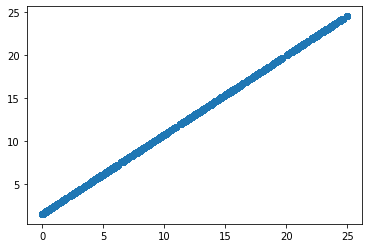

In [90]:

plt.scatter(X_train[:,0],predictor.predict(X_train))
plt.plot()
loss=predictor.jundgement(X_train,Y_train)
print("均方根误差：",loss)

经过多次观察我发现结果的翻车与否与W生成的随机数值有很大关系，如果W生成的就很大或者很小，那么结果就会偏的离谱，
如果W一开始就接近一，那么结果就会很好。分析得出是学习率太小了，于是就往上猛调两个数量级，同时把批量数据数量也调小一点
结果就是：
perfect!
那么接下来我们就用训练好的数据去进行测试集test

[]

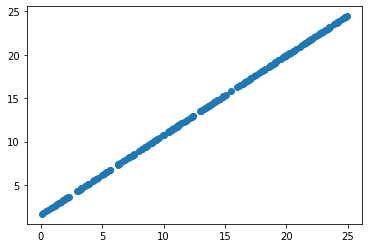

In [91]:
y_pred=predictor.predict(X_test)
plt.scatter(X_test[:,0],y_pred)
plt.plot()


结果非常理想，然后最后一步就是把数据导入txt打把邮件发给助教，然后去写实验报告


In [92]:

np.savetxt("预测结果.txt",y_pred)